### Xiaomeng Leng


# 1.) Pull in Data and Convert ot Monthly

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [41]:
df.diff().shift(-1)

,Adj Close
Date,
1980-12-31,-0.020296
1981-01-31,-0.006045
1981-02-28,-0.006909
1981-03-31,0.013386
1981-04-30,0.016409
...,...
2023-09-30,-0.439423
2023-10-31,19.404678
2023-11-30,2.580002


In [42]:

#difference in stockprice
df["diff"] = df.diff().shift(-1)

df["Target"] = np.sign(df["diff"])

df["Premium"] = .08*df["Adj Close"]

In [43]:
df.head()

,Adj Close,diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [46]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [47]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

In [48]:
df

,Adj Close,diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156


# 4.) Add columns, prediction and profits.

In [26]:
df["Prediction"] = y_pred

In [27]:
df["Profits"] = 0.

In [34]:
# true positive
df.loc[(df["Prediction"] == 1) & (df["Target"] == 1), "Profits"]= df["Premium"]

# false positive
df.loc[(df["Prediction"] == 1) & (df["Target"] == -1), "Profits"]= 100 * df["diff"] + df["Premium"]


In [35]:
df

,Adj Close,diff,Target,Premium,Prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

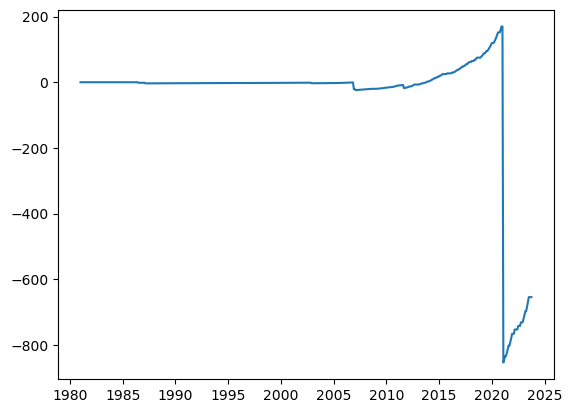

In [37]:
plt.plot(np.cumsum(df["Profits"]))

plt.show()

## 5.5

Drawing upon the quantitative and econometric training received from my Master's in Quantitative Economics (MQE), I can assist Mr. Liu in conducting sophisticated quantitative analyses. These analyses are pivotal in constructing dynamic economic models that can forecast future market trends and fluctuations with a degree of precision that is indispensable in today's volatile economic climate. By leveraging techniques such as time-series analysis and predictive modeling, I aim to provide Mr. Liu with actionable insights into potential risks and returns, thereby facilitating prudent risk management strategies.

Furthermore, my background in economics has equipped me with a deep understanding of consumer behavior and preferences, which is crucial in tailoring investment portfolios to align with individual customer profiles. This bespoke approach ensures that each portfolio is not only optimized for performance but also resonates with the unique investment goals and risk appetites of our clientele.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.